# Project

The project aims to build a machine learning model using various Python-based machine learning libraries to predict whether or not someone has heart disease based on their medical attributes.

## Problem Definition

We are dealing with a Binary classification problem. To classify whether someone has a heart disease based on given clinical parameters.

## About Data

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. This database includes 76 attributes, but all published studies relate to using a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient whether that particular person has heart disease or not and the other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

- **age:** It is the age of the patient in the years unit; Integer
- **sex:** Patient is either male or female; categorical field
- **cp:** level of chest pain; categorical 
    - 0: Typical Angina: chest pain related to decreased blood supply to the heart.
    - 1: Atypical Angina: chest pain not related to the heart.
    - 2: Non-anginal pain: typically esophageal spasms (non-heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease.
- **trestbps:** resting blood pressure (on admission to the hospital), which is measured in 'mm Hg'; Integer
    - anything above 130-140 is typically cause for concern
- **chol:** serum cholesterol level in 'mg/dl', above 200 can causes a concern; Integer
- **fbs:** fasting blood sugar > 120 mg/dl; Categorical field -- values [1- Ture, 0-false]
- **restecg:** resting electrocardiographic results
    - Value 0: Normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
- **thalach:** maximum heart rate achieved; Integer
- **exang:** exercise-induced angina; Categorical --values [1- yes, 0- no]
- **oldpeak:** ST depression induced by exercise relative to rest; Integer
  - a phenomenon where a person's electrocardiogram (ECG) shows a downward deflection of the ST segment during exercise, which is not present when they are at rest, indicating potential coronary artery disease (CAD) as the heart muscle may not be receiving enough blood flow during increased demand due to exercise.
- **slope:** the slope of the peak exercise ST segment; categorical -- values [flat, downsloping, upsloping]
  - 0: Upsloping: better heart rate with excercise (uncommon)
  - 1: Flatsloping: minimal change (typical healthy heart)
  - 2: Downslopins: signs of unhealthy heart
- **ca:** number of major vessels (0-3) coloured by fluoroscopy; Integer
- **thal:** thalium stress result
    - Value 0 = normal;
    - Value 1 = fixed defect;
    - Value 2 = reversible defect
- **target:** has a heart disease or not; categorical


## Evalution Metric

Initially, the target of the model is to achieve 95% accuracy, which might vary based on the performance of models and other metrics such as AUC-ROC, confusion matrix and classification report.  

## Imports - tools needed for the project

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
data = pd.read_csv("./heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Preliminary Exploration
How many rows and columns are there? Check for the missing values and duplicate rows. What are Dtypes of the columns

In [3]:
data.shape

(303, 14)

- the dataset consists of 14 columns and 303 rows.

In [4]:
# Missing value
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#duplicate values
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
#checking the class balance of the target variable
data["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

### Descriptive Statistics of a numeric field


In [8]:
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
data[num_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [9]:
## Descriptive Stats for heart disease.
data[data["target"] == 1][num_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,164.000000,164.000000,164.000000,164.000000,164.000000
mean,52.585366,129.250000,242.640244,158.378049,0.586585
std,9.511957,16.204739,53.456580,19.199080,0.781734
min,29.000000,94.000000,126.000000,96.000000,0.000000
25%,44.750000,120.000000,208.750000,148.750000,0.000000
50%,52.000000,130.000000,234.500000,161.000000,0.200000
75%,59.000000,140.000000,267.250000,172.000000,1.025000
max,76.000000,180.000000,564.000000,202.000000,4.200000


- The average `age` of having a heart disease is around 53 years only.
- Patients having heart disease at the lowest `age` of 29. 
- 75% of patients who have a disease have `chol` greater than 200, which is considered to be borderline risk.
- 50% of patients having the disease have a `Blood pressure (trestbps)` of 130, which is Stage 1 Risk
- The max `Blood pressure` of the patient is 180 (stage 3 risk). However, that's not the max in the whole data. There are some with 200 with not have heart disease. 

### Young Adult have heart disease; age < 40
pull out the patients with age < then 40 and has the heart disease.

In [10]:
data.query('target == 1 and age < 40')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


- The person with the lowest age has a cholesterol of > 200, which is concerning. and slop 2, which is a sign of an unhealthy heart.
- In young Adult patients, either chol is high, or slop is 2, which leads to heart disease. We can verify later all the patients.
- None of them had pain in the chest while exercising. (exang) and their stress level were normal too (thal)

### Number of Patients with heart disease by gender?
How many males and females have the heart disease?

In [11]:
data["sex"].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [12]:
count_gender = data.groupby(["sex", "target"], as_index=False).size()
count_gender
#we can use crosstab too

,sex,target,size
0,0,0,24
1,0,1,72
2,1,0,114
3,1,1,92


In [13]:
count_gender['sex'] = count_gender['sex'].map({1 : 'Male', 0 : 'Female'})

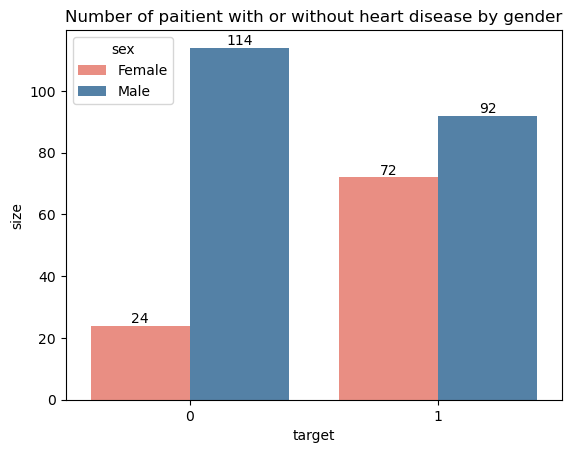

In [14]:
ax = sns.barplot(count_gender, x="target", y="size", hue="sex", palette=["Salmon", "steelblue"])
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Number of paitient with or without heart disease by gender")

plt.show()

- Out of 96 total females, 72 have heart disease; more than three-quarters of total females
- Out of the total males, almost 45% suffer from heart disease.
- In comparison, 7.8 out of 10 females and 4.5 out of 10 males have heart disease.

In [15]:
data["thal"].value_counts()

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64

### Chest pain per the heart disease frequency.
What type of pain do the patients have with most heart disease? 

In [20]:
chest_pain_target = pd.crosstab(data["cp"], data["target"])
chest_pain_target

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


meaning of Chest pain values:-
- 0: Typical Angina: chest pain related to decreased blood supply to the heart.
- 1: Atypical Angina: chest pain may or may not relate to the heart; pain that doesn't fit the usual description of pain.
- 2: Non-anginal pain: feels like pain from the heart, but it does not originate from the heart (non-heart related)
- 3: Asymptomatic: chest pain not showing signs of disease.

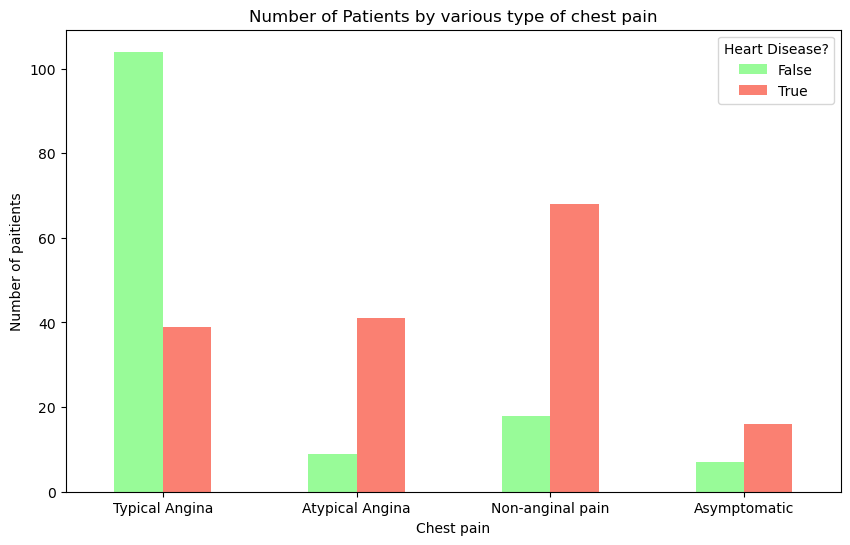

In [42]:
#plot a bar chart
chest_pain_target.plot(kind="bar", figsize=(10,6), color=["palegreen", "salmon"])
plt.legend(["False", "True"], title="Heart Disease?")

plt.title("Number of Patients by various type of chest pain")
plt.ylabel("Number of paitients")

plt.xlabel("Chest pain")
plt.xticks(ticks=[0, 1, 2, 3], 
           labels=["Typical Angina", "Atypical Angina", "Non-anginal pain", "Asymptomatic"], 
           rotation="horizontal")
plt.show()

- Intriguing, 60% of ppl with pain because of a decrease in the blood supply in the heart do not have heart disease.
- Patients with all other types of pain have a higher chance of having heart disease.
- Surprisingly, Non-anginal pain is not related to the heart; it has the highest number of heart disease patients. 

### Exang with target variable

In [45]:
excerise_chest_pain_target = pd.crosstab(data["exang"], data["target"])
excerise_chest_pain_target

target,0,1
exang,,
0,62,141
1,76,23


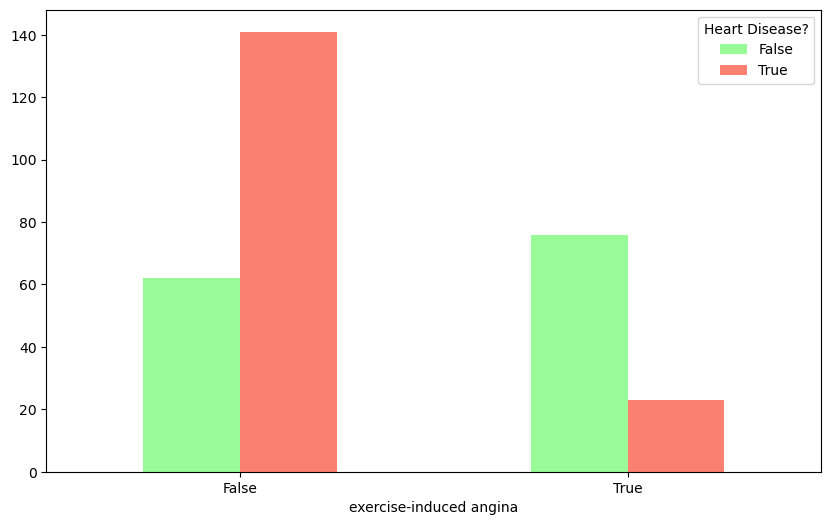

In [57]:
excerise_chest_pain_target.plot(kind="bar", figsize=(10,6), color=["palegreen", "salmon"])

plt.xlabel("exercise-induced angina")
plt.xticks([0,1], ["False","True"], rotation="horizontal")

plt.legend(["False", "True"], title="Heart Disease?")

plt.show()

- Out of all patients having heart disease, 85% of People do not have `exang`; which means the highest number of patients don't have problem with chest pain while exercising but suffer from heart problems.
- Only 23 ppl, which is 7.5 percent of the total, fall under both categories.

### Maximum heart rate by age having and not having heart disease. 

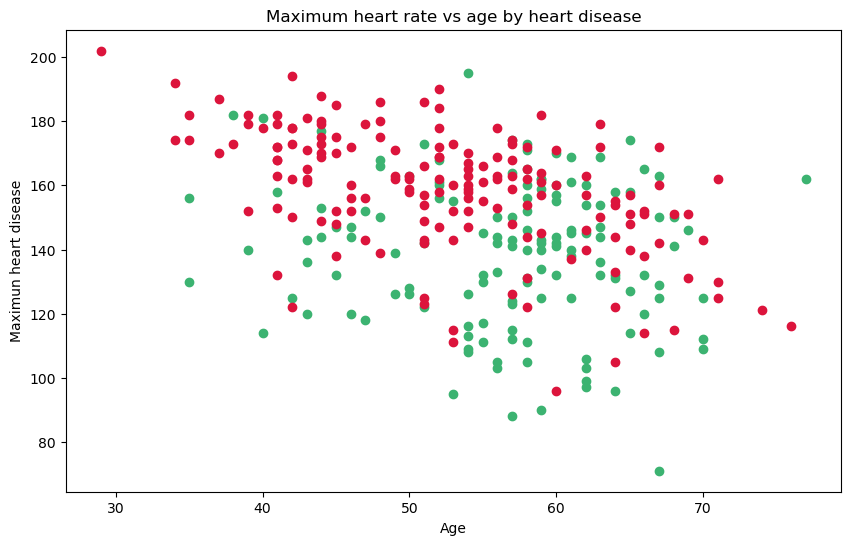

In [87]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(data[data["target"] == 0]["age"], data[data["target"] == 0]["thalach"], color="mediumseagreen", label="no heart disease")
ax.scatter(data[data["target"] == 1]["age"],  data[data["target"] == 1]["thalach"], color="crimson", label="has heart disease")

ax.set(title="Maximum heart rate vs age by heart disease", xlabel="Age", ylabel="Maximun heart disease")

plt.show()

- We can see a decrease in heart disease as the age increases.

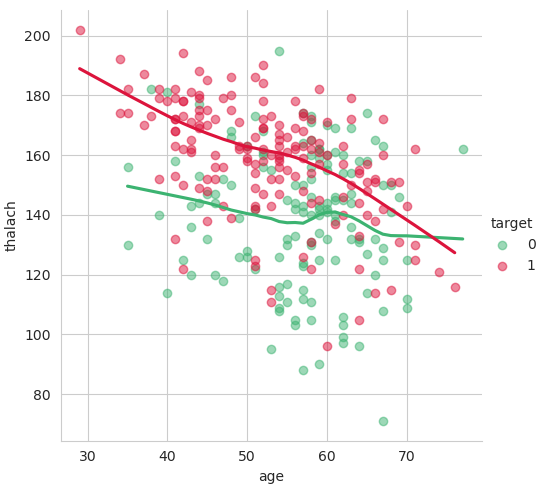

In [114]:
#visuilize with 
with sns.axes_style("whitegrid"):
    sns.lmplot(data=data, 
               y="thalach", 
               x="age", 
               lowess=True, 
               hue="target",
               palette=["mediumseagreen", "crimson"],
               scatter_kws = {'alpha': 0.5})

plt.show()

### Correlation matrix